In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, u_darrays as uda, u_arrays as ua
import datetime
import matplotlib.colors as mcolors
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from utils import u_plot as uplot
import salem
import numpy.ma as ma
from scipy import stats
import warnings
from scipy.ndimage.measurements import label as label_region
from scipy.ndimage.measurements import find_objects

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [418]:
#mcs = cnst.GRIDSAT_PERU + 'aggs/gridsat_WA_-40_allClouds_monthly.nc'
mcs = cnst.GRIDSAT_PERU + 'aggs/gridsat_WA_count_-30_allClouds_monthly.nc'
chirps = '/media/ck/Elements/SouthAmerica/CHIRPS/chirps-v2.0.monthly.nc'
enso = '/home/ck/DIR/mymachine/ENSO/ONI.csv'#'/home/ck/DIR/mymachine/ENSO/meiv2.data'
fpath = cnst.network_data + 'figs/HUARAZ/'

fname = '/home/ck/DIR/cornkle/data/HUARAZ/shapes/riosan_sel_one.shp'
isbuffer = [-79, -74, -12, -7]

sdf = salem.read_shapefile(fname)
sdf = salem.transform_geopandas(sdf, to_crs=salem.wgs84)

da3 = xr.open_dataarray(mcs).sel(lon=slice(isbuffer[0], isbuffer[1]), lat=slice(isbuffer[2], isbuffer[3]))
ca = xr.open_dataarray(chirps).sel(longitude=slice(isbuffer[0], isbuffer[1]), latitude=slice(isbuffer[2], isbuffer[3]))
# This masks out the data which is not in the region

ens = pd.read_csv(enso, sep=',', engine='python', names=np.arange(0, 13),index_col=0)

ca[0,:,:].salem.roi(shape=sdf).plot.pcolormesh()

da3 = da3.salem.roi(shape=sdf).mean(['lat', 'lon'])*100
ca = ca.salem.roi(shape=sdf).mean(['latitude', 'longitude'])
months= [1,2,3,4,5,6,7,8,9,10,11,12]#,4,5,6,9,10,11#,4,5,6,9,10,11,(3,5), (9,11)]#, 10,5,9]#[(12,2)]#[1,2,3,4,5,6,7,8,9,10,11,12]# #,2,3,11,12]#[(12,2)]#[1,2,3,4,5,6,7,8,9,10,11,12]# #,2,3,11,12]


FileNotFoundError: [Errno 2] No such file or directory: b'/media/ck/Elements/SouthAmerica/CHIRPS/chirps-v2.0.monthly.nc'

In [419]:
thresh=0.4
picks = ens.copy()
picks[ens<=-thresh]=-1
picks[ens>=thresh]=1
picks[(ens>=-thresh) & (ens<=thresh)] = 0

In [364]:
recent = ens.loc[2000:2018]

In [365]:
recent

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
2000,-1.66,-1.41,-1.07,-0.81,-0.71,-0.64,-0.55,-0.51,-0.55,-0.63,-0.75,-0.7
2001,-0.68,-0.52,-0.44,-0.34,-0.25,-0.12,-0.08,-0.13,-0.19,-0.29,-0.35,-0.3
2002,-0.15,0.03,0.09,0.20,0.43,0.65,0.79,0.86,1.01,1.21,1.31,1.1
2003,0.92,0.63,0.38,-0.04,-0.26,-0.16,0.08,0.21,0.26,0.29,0.35,0.3
2004,0.37,0.31,0.23,0.17,0.17,0.28,0.47,0.64,0.70,0.67,0.66,0.6
2005,0.64,0.58,0.45,0.43,0.29,0.11,-0.06,-0.14,-0.11,-0.29,-0.57,-0.8
2006,-0.79,-0.67,-0.47,-0.28,-0.05,0.04,0.12,0.27,0.48,0.71,0.90,0.9
2007,0.71,0.32,-0.03,-0.23,-0.29,-0.41,-0.54,-0.84,-1.13,-1.40,-1.54,-1.6
2008,-1.59,-1.42,-1.19,-0.92,-0.75,-0.54,-0.35,-0.26,-0.30,-0.41,-0.60,-0.7


<Figure size 936x360 with 0 Axes>

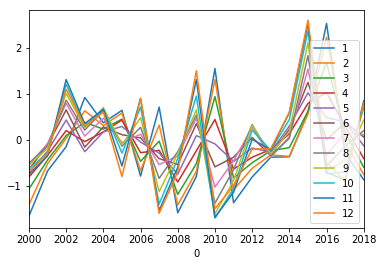

In [366]:
f = plt.figure(figsize=(13,5))
recent.plot()

In [367]:
dti = pd.date_range('2000-01-01', periods=228, freq='m')

In [368]:
dti

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30',
               '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31',
               '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', length=228, freq='M')

In [409]:
testchirp = ca[(ca['time.year']>=1985)&(ca['time.year']<=2018)]

In [410]:
mean = testchirp.groupby('time.month').mean()

In [411]:
mean

<xarray.DataArray 'precip' (month: 12)>
array([ 98.56972  , 125.762695 , 153.7372   ,  71.67288  ,  22.125807 ,
         3.5122313,   2.9699535,   7.9463696,  25.946096 ,  58.98163  ,
        63.69107  ,  85.04888  ], dtype=float32)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [412]:
testchirp = testchirp.groupby('time.month')-mean

In [413]:
testchirp

<xarray.DataArray 'precip' (time: 408)>
array([-3.23487167e+01, -8.46544647e+00, -4.05727310e+01, -9.00910568e+00,
        8.25443268e-02, -3.62784147e-01,  6.50521278e-01,  3.29923153e-01,
        1.20158978e+01, -2.88460388e+01, -2.86526299e+01, -1.96828308e+01,
        3.63933563e+00, -2.20512466e+01, -4.42807388e+01, -8.58761597e+00,
       -9.37491989e+00, -7.45184660e-01, -1.75655127e-01,  1.41889048e+00,
        9.62287903e-01, -2.94477501e+01, -2.66542740e+01, -3.89166260e+00,
        3.19583588e+01, -1.59720917e+01, -2.75534973e+01, -2.16612892e+01,
       -5.83899879e+00, -5.63313723e-01, -2.35398769e-01, -6.28946781e-01,
        1.49003029e+00, -2.22496490e+01, -3.12186813e+00,  1.16363602e+01,
        1.00951233e+01, -3.28314667e+01, -7.71199036e+01,  1.87615967e+00,
       -7.45147705e-01, -6.22103453e-01, -5.59876204e-01, -8.33778381e-02,
       -1.11074066e+00, -4.50920868e+00, -3.46809387e+00, -1.73642654e+01,
        5.85667419e+00,  1.39365540e+01, -3.90921021e+00,  4.81256866e+00,
       -5.28617096e+00, -3.21166515e-01,  1.41076946e+00,  5.76965475e+00,
        2.15911160e+01,  3.87262268e+01, -1.98079643e+01, -4.73549881e+01,
       -3.73310776e+01, -5.64369736e+01, -7.46422348e+01, -3.21019974e+01,
       -4.12557793e+00,  8.11466217e-01, -2.13024378e-01, -1.77498531e+00,
       -7.80882835e+00,  2.33869171e+01,  3.46952744e+01, -2.82161522e+01,
       -3.91318207e+01, -5.96674576e+01, -2.08603973e+01, -1.57774963e+01,
       -1.08932877e+00, -7.76167631e-01,  1.71481371e-01, -1.97993088e+00,
       -1.00302401e+01,  5.23427582e+00,  4.98138428e-01, -3.27671547e+01,
       -5.46638489e+01, -6.57671661e+01, -4.95138931e+01, -9.14817047e+00,
        2.18563080e-01,  1.79401875e-01, -1.94518805e-01,  1.16182852e+00,
       -3.78232193e+00, -1.71363945e+01, -2.88235321e+01, -4.59553108e+01,
       -1.64662170e+00,  3.77587738e+01,  9.77327881e+01,  3.75415802e+01,
        5.64579582e+00, -5.06414652e-01, -8.20779800e-03, -9.58397388e-01,
        1.58600445e+01,  1.22977829e+01,  3.56932144e+01,  5.72832260e+01,
        4.55354309e+01,  3.35614319e+01,  1.42635345e+01,  2.38912964e+01,
        9.21176529e+00, -3.76025438e-01, -4.99385118e-01, -1.74157047e+00,
        1.04567719e+00, -2.39029083e+01, -7.07323456e+00, -1.33531189e+00,
       -2.10605011e+01, -2.25945587e+01, -3.67633057e+01, -1.95653534e+00,
        7.94136238e+00, -5.38432598e-02, -5.35201550e-01, -1.55081415e+00,
       -6.61758995e+00, -4.41106415e+00,  1.23425140e+01, -4.53816986e+00,
        1.63850937e+01,  1.31197662e+01,  4.42651367e+00,  1.46519089e+01,
       -5.05083084e-01, -7.28400469e-01, -5.47954321e-01,  8.52476597e-01,
       -5.76800919e+00,  1.09238510e+01, -2.62618294e+01, -3.37112541e+01,
       -6.65937805e+00, -4.33599091e+00, -8.88196030e+01, -2.34894295e+01,
       -3.70655060e+00, -4.95523453e-01, -4.07121897e-01, -1.16251898e+00,
        7.78505325e-01, -3.82733154e+00,  3.08721085e+01,  6.18372421e+01,
        7.14725189e+01,  7.81060486e+01,  4.88478546e+01,  1.26093826e+01,
       -4.72848892e+00, -4.12960052e-02, -6.19662285e-01, -1.61750507e+00,
       -2.71677780e+00,  3.49433975e+01, -2.19004097e+01, -1.56889343e+01,
        1.84686356e+01,  1.15595581e+02, -2.70240402e+01,  3.93984985e+00,
        8.29956055e+00,  8.95830154e-01, -2.24447489e-01, -9.14164066e-01,
        1.28423634e+01, -9.29390335e+00,  9.03367615e+00,  3.66482544e+00,
        2.00728607e+00,  3.19935608e+01, -1.79816437e+01,  3.43426514e+00,
        1.03706608e+01, -3.79119158e-01, -2.30981588e-01,  1.48526621e+00,
        6.80776405e+00, -2.39983406e+01, -2.20402794e+01,  2.22007675e+01,
        6.78154144e+01, -2.21741104e+01,  3.23538971e+01, -1.53370857e+01,
       -2.50873184e+00, -5.29827595e-01,  1.35819674e-01, -2.18825102e+00,
        1.54595890e+01, -1.94129944e+00,  5.16056747e+01, -1.81078644e+01,
       -3.27503433e+01,  4.39933777e+00,  2.59092102e+01,  8.14684296e+00,
       -7.03260517e+00, -2.89335251e-01,  1.39067888e-01, -2

In [408]:
testgrid = da3[(da3['time.year']>=1985)&(da3['time.year']<=2018)]
gmean = testgrid.groupby('time.month').mean()
testgrid = testgrid.groupby('time.month')-gmean

(-75, 75)

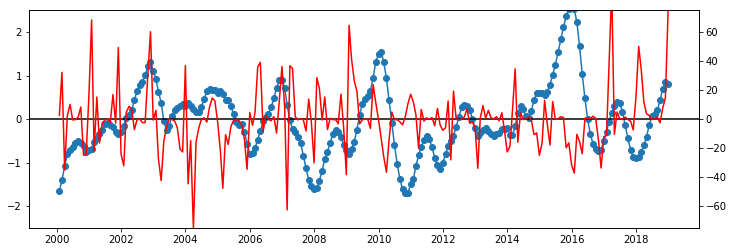

In [375]:
gti = pd.date_range('2000-01-01', periods=216, freq='m')
f = plt.figure(figsize=(12,4))
ax = f.add_subplot(111)
plt.plot(dti,recent.values.flatten(), marker='o')
plt.axhline(0, color='k')
ax.set_ylim(-2.5,2.5)
ax1 = ax.twinx()
ax1.plot(dti, testchirp, 'r')
ax1.set_ylim(-75,75)


(-20, 20)

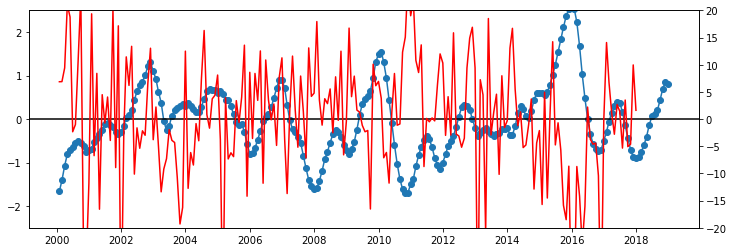

In [376]:
f = plt.figure(figsize=(12,4))
ax = f.add_subplot(111)
plt.plot(dti,recent.values.flatten(), marker='o')
plt.axhline(0, color='k')
ax.set_ylim(-2.5,2.5)
ax1 = ax.twinx()
ax1.plot(gti, testgrid, 'r')
ax1.set_ylim(-20,20)

In [377]:
nino_list = []
for year, pp in zip(picks.index,picks.values):
    
    uni, count = np.unique(pp, return_counts=True)
    
#     if year == 2009:
#         ipdb.set_trace()
    
    pos = np.where(count>=5)
    if pos[0].size == 0:
        enso = 0
    else:
        if pos[0].size>1:
            pos = np.argmax(count)
            pos = [pos]
            #ipdb.set_trace()
        enso = int(uni[pos[0]])
    #ipdb.set_trace()
    nino_list.append(enso)
    
    
    

In [378]:
nino_list

[-1,
 1,
 0,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 -1,
 1,
 0,
 0,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 -1,
 -1,
 0,
 1,
 -1,
 0,
 0,
 1,
 0,
 0,
 1,
 -1,
 0,
 1,
 -1,
 -1,
 -1,
 0,
 1,
 0,
 0,
 0,
 0,
 -1,
 -1,
 1,
 -1,
 -1,
 0,
 0,
 0,
 1,
 -1,
 0,
 0,
 1,
 -1]

In [379]:
picks['ENSO'] = nino_list

In [380]:
picks.loc[2000:2019]

,1,2,3,4,5,6,7,8,9,10,11,12,ENSO
0,,,,,,,,,,,,,
2000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1
2001,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2002,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2003,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2004,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2005,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0
2006,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0
2007,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1
2008,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1


In [381]:
picks.loc[2010,'ENSO']

-1

KeyError: 'ENSO'

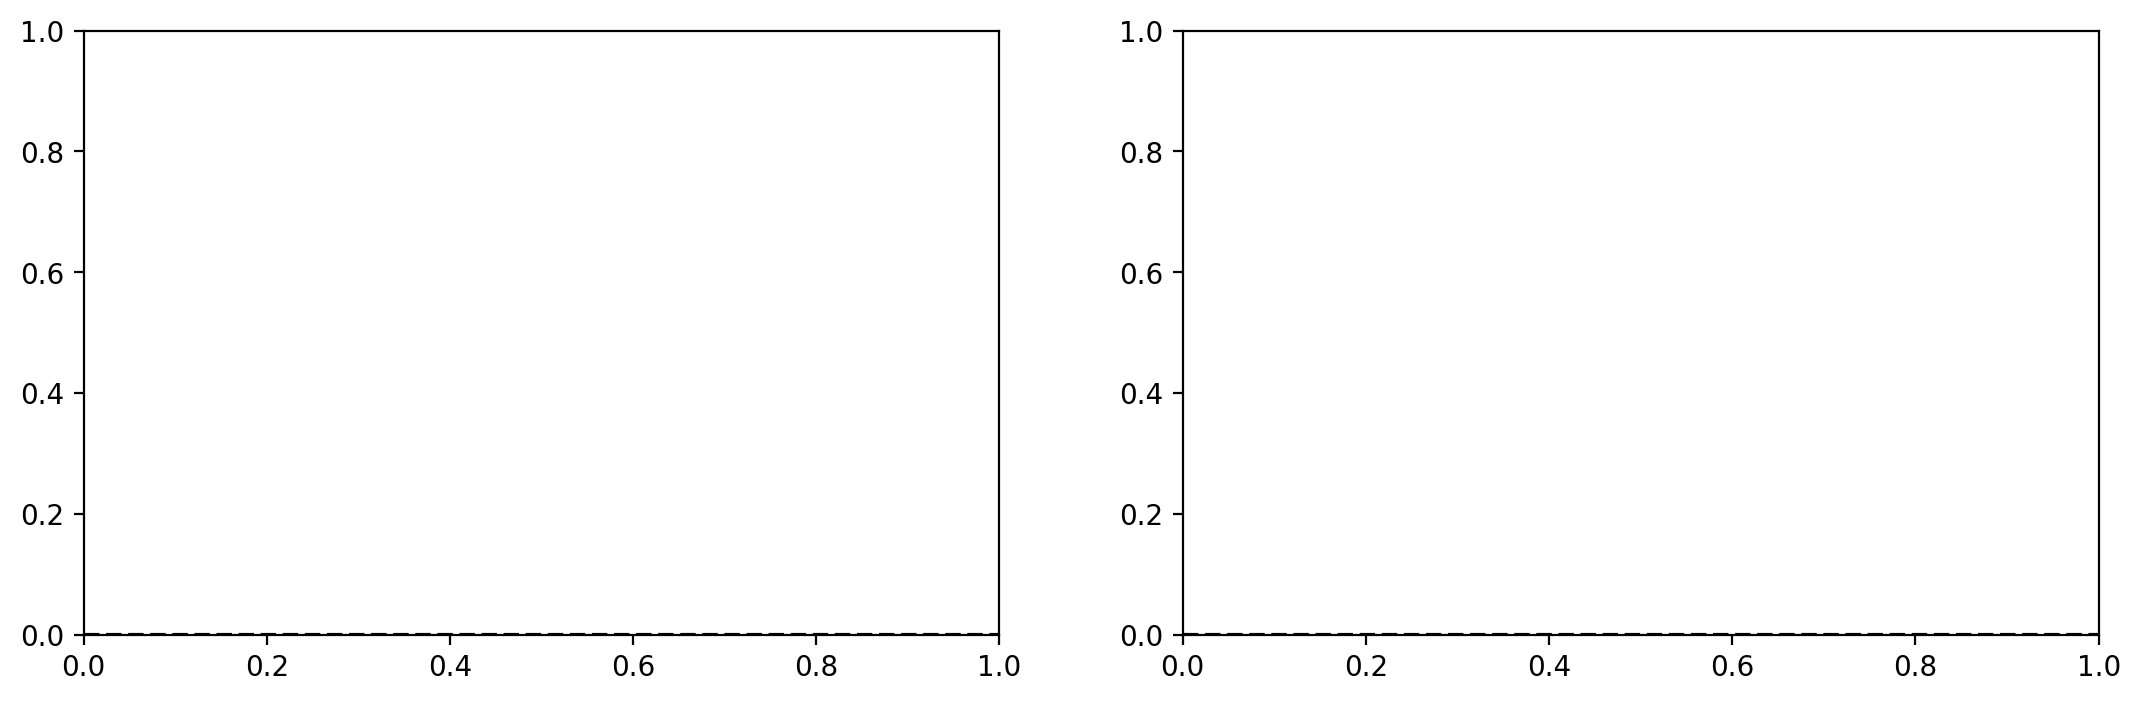

In [420]:
f = plt.figure(figsize=(13,4), dpi=200)
cnino_mean = []
cnina_mean = []
cneutral_mean = []
call_mean = []

gnino_mean = []
gnina_mean = []
gneutral_mean = []
gall_mean = []

ax = f.add_subplot(121)
plt.axhline(0, color='k', linestyle='dashed')
ax1 = f.add_subplot(122)
plt.axhline(0, color='k', linestyle='dashed')

for y in range(2000, 2018):
    
#     chirp = testchirp[testchirp['time.year']==y]
#     grid = testgrid[testgrid['time.year']==y]

    chirp = ca[ca['time.year']==y]
    grid = da3[da3['time.year']==y]

    #ipdb.set_trace()
    
    if picks.loc[y, 'ENSO'] == 0:
        color = 'grey'
        cneutral_mean.append(chirp)
        gneutral_mean.append(grid)
        
        ax.plot(range(1,13), chirp, color=color, alpha=0.3)
        
        ax1.plot(range(1,13), grid, color=color, alpha=0.3)
        
        
        
    if picks.loc[y, 'ENSO'] == -1:
        color = 'blue'
        cnina_mean.append(chirp)
        gnina_mean.append(grid)
        ax.plot(range(1,13), chirp, color=color, alpha=0.3)
        ax1.plot(range(1,13), grid, color=color, alpha=0.3)
        
    if picks.loc[y, 'ENSO'] == 1:
        color = 'red'
        cnino_mean.append(chirp)
        gnino_mean.append(grid)
        
        ax.plot(range(1,13), chirp, color=color, alpha=0.3)
        ax1.plot(range(1,13), grid, color=color, alpha=0.3)
        
ax.plot(range(1,13), np.mean(cnina_mean,axis=0), color='turquoise')
ax1.plot(range(1,13),np.mean(gnina_mean,axis=0), color='turquoise')
ax.plot(range(1,13),np.mean(cneutral_mean,axis=0), color='k')
ax1.plot(range(1,13),np.mean(gneutral_mean,axis=0), color='k')

ax.plot(range(1,13), np.mean(cnino_mean,axis=0), color='red')
ax1.plot(range(1,13), np.mean(gnino_mean,axis=0), color='red')
    
ax.set_title('Chirps')
ax1.set_title('Gridsat')

Text(0.5,1,'Gridsat')

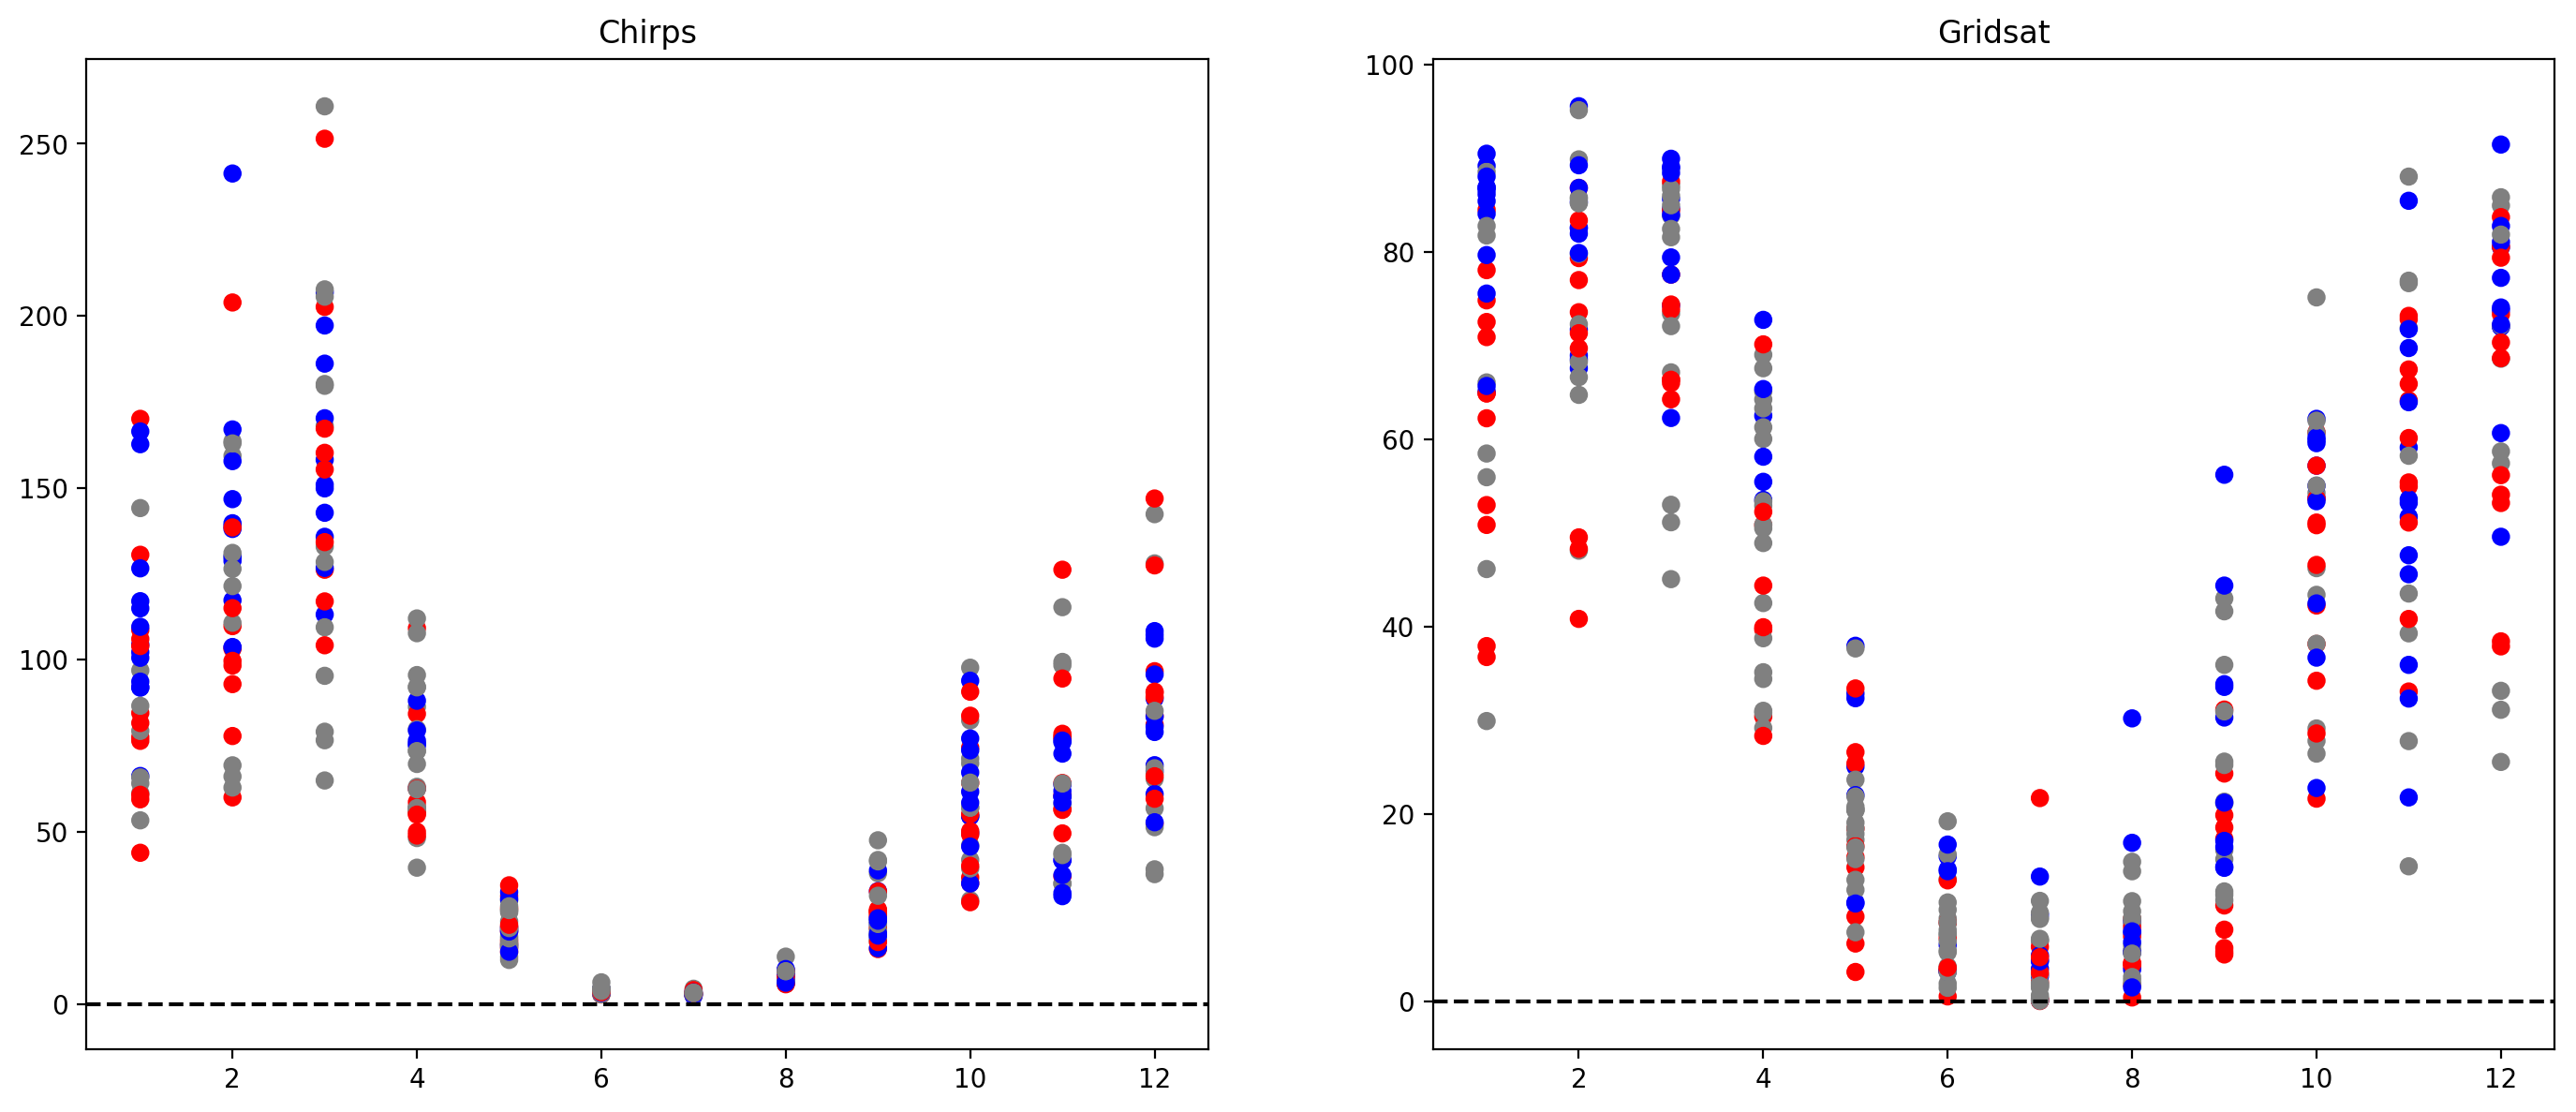

In [383]:
f = plt.figure(figsize=(17,7), dpi=200)
cnino_mean = []
cnina_mean = []
cneutral_mean = []
call_mean = []

gnino_mean = []
gnina_mean = []
gneutral_mean = []
gall_mean = []

ax = f.add_subplot(121)
plt.axhline(0, color='k', linestyle='dashed')
ax1 = f.add_subplot(122)
plt.axhline(0, color='k', linestyle='dashed')

for y in range(1985, 2018):
    
#     chirp = testchirp[testchirp['time.year']==y]
#     grid = testgrid[testgrid['time.year']==y]

    chirp = ca[ca['time.year']==y]
    grid = da3[da3['time.year']==y]

    #ipdb.set_trace()
    
    pick = picks.loc[y,:]#.values
    pick = pick.drop('ENSO')
    pick = pick.values
    
    nina = np.where(pick==-1)[0]
    nino = np.where(pick==1)[0]
    neut = np.where(pick==0)[0]
    
    #ipdb.set_trace()
    color = np.array(['grey']*12)
    color[nina] = 'blue'
    color[nino] = 'red'

        
    ax.scatter(range(1,13), chirp, color=color)
        
    ax1.scatter(range(1,13), grid, color=color)

    
ax.set_title('Chirps')
ax1.set_title('Gridsat')

In [384]:
nino = []
nina = []
neutral = []
for y in range(2000,2020):
    
    print(get_enso_df(y))

NameError: name 'get_enso_df' is not defined

In [ ]:
ispos = corr_all.isel(dayofyear=1).where((corr_all.longitude==-76.5)&(corr_all.latitude==-9.5))
pickpos = np.where(np.isfinite(ispos['r']))

y = int(pickpos[0])
x = int(pickpos[1])

date = pd.datetime(2017, 1, 1) + pd.Timedelta(str(outarr_3[y,x] - 1)+' days')
dstr = date.strftime("%d/%m")
print('Huaraz onset', outarr_3[y,x], 'Date', dstr)
date = pd.datetime(2017, 1, 1) + pd.Timedelta(str(endarr_5[y,x] - 1)+' days')
dstr = date.strftime("%d/%m")
print('Huaraz retreat', endarr_5[y,x], 'Date', dstr)

In [ ]:
ispos = corr_all.isel(dayofyear=1).where((corr_all.longitude==-77.5)&(corr_all.latitude==-9.5))
pickpos = np.where(np.isfinite(ispos['r']))

y = int(pickpos[0])
x = int(pickpos[1])

date = pd.datetime(2017, 1, 1) + pd.Timedelta(str(outarr_3[y,x] - 1)+' days')
dstr = date.strftime("%d/%m")
print('Huaraz onset', outarr_3[y,x], 'Date', dstr)
date = pd.datetime(2017, 1, 1) + pd.Timedelta(str(endarr_5[y,x] - 1)+' days')
dstr = date.strftime("%d/%m")
print('Huaraz retreat', endarr_5[y,x], 'Date', dstr)

In [ ]:
pickpos

In [385]:
pickpos[0]

NameError: name 'pickpos' is not defined